In [1]:
## Importing all the libraries
import pandas as pd
import numpy as np
import xgboost as xgb
import os
from math import *
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [2]:
path = "D:\\Affine_Projects\\WB_Warner_Bros\\Marketing-KPI_Impact\\"
df = pd.read_excel(path+"KPI_DataSet.xlsx",sheetname = "Prediction Data")

In [11]:
df

Row Labels  Max of UA  Max of UA-First Choice  \
0                           A Way Out      0.050                   0.005   
1           Assassin's Creed: Odyssey      0.042                   0.011   
2                       Battlefield V      0.065                   0.014   
3        Call of Duty: Black Ops IIII      0.109                   0.038   
4               Dark Souls Remastered      0.015                   0.005   
5               Detroit: Become Human      0.058                   0.015   
6                           Far Cry 5      0.105                   0.036   
7                             FIFA 19      0.089                   0.037   
8                     Forza Horizon 4      0.026                   0.006   
9                     God of War 2018      0.196                   0.080   
10                           Hitman 2      0.047                   0.007   
11                       Just Cause 4      0.047                   0.012   
12                    Just Dance 2019      0.021                   0.005   
13          Kingdom Come: Deliverance      0.023                   0.004   
14             Lego DC Super Villains      0.007                   0.003   
15                      Madden NFL 19      0.072                   0.019   
16                Marvel's Spider-Man      0.166                   0.060   
17              Monster Hunter: World      0.050                   0.008   
18  Naruto To Boruto: Shinobi Striker      0.005                   0.002   
19                           NBA 2K19      0.059                   0.021   
20                             NHL 19      0.020                   0.006   
21    Ni No Kuni II: Revenant Kingdom      0.013                   0.006   
22             Red Dead Redemption II      0.135                   0.053   
23                     Sea Of Thieves      0.065                   0.017   
24        Shadow Of The Colossus 2018      0.026                   0.007   
25          Shadow Of The Tomb Raider      0.035                   0.005   
26            Spyro Reignited Trilogy      0.030                   0.011   
27                   State of Decay 2      0.043                   0.010   
28     Sword Art Online: Fatal Bullet      0.004                   0.001   
29                         The Crew 2      0.045                   0.009   
30                              UFC 3      0.031                   0.006   
31                           WWE 2K19      0.030                   0.010   

    Max of AA  Max of PO/BFW  Max of Wait  Max of Own  \
0        0.40           0.16         0.11        0.01   
1        0.78           0.09         0.16        0.03   
2        0.67           0.11         0.14        0.03   
3        0.81           0.16         0.14        0.04   
4        0.49           0.13         0.09        0.04   
5        0.42           0.11         0.10        0.05   
6        0.63           0.13         0.12        0.03   
7        0.67           0.09         0.11        0.02   
8        0.47           0.08         0.10        0.02   
9        0.63           0.20         0.11        0.06   
10       0.55           0.08         0.11        0.02   
11       0.42           0.09         0.08        0.02   
12       0.54           0.07         0.08        0.02   
13       0.30           0.06         0.11        0.04   
14       0.60           0.08         0.12        0.02   
15       0.63           0.11         0.11        0.02   
16       0.63           0.15         0.13        0.04   
17       0.35           0.08         0.09        0.03   
18       0.29           0.06         0.07        0.02   
19       0.59           0.10         0.11        0.03   
20       0.52           0.08         0.11        0.02   
21       0.26           0.08         0.09        0.02   
22       0.54           0.13         0.10        0.04   
23       0.36           0.08         0.09        0.03   
24       0.43           0.16         0.09        0.07   
25       0.47           0.09        

In [12]:
#### Imputing with Mean
def imputeData(df,titleColName):
    df1 = df.drop([titleColName],axis=1)
    imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
    imputer.fit(df1.values)
    df2 = pd.DataFrame(imputer.transform(df1))
    df2.columns = df1.columns
    df2.index = df1.index
    df3 = pd.concat([df[[titleColName]],df2],axis=1)
    return df3

df = imputeData(df,'Row Labels')
df.to_excel(path+"imputed1.xlsx")
df

Row Labels  Max of UA  Max of UA-First Choice  \
0                           A Way Out      0.050                   0.005   
1           Assassin's Creed: Odyssey      0.042                   0.011   
2                       Battlefield V      0.065                   0.014   
3        Call of Duty: Black Ops IIII      0.109                   0.038   
4               Dark Souls Remastered      0.015                   0.005   
5               Detroit: Become Human      0.058                   0.015   
6                           Far Cry 5      0.105                   0.036   
7                             FIFA 19      0.089                   0.037   
8                     Forza Horizon 4      0.026                   0.006   
9                     God of War 2018      0.196                   0.080   
10                           Hitman 2      0.047                   0.007   
11                       Just Cause 4      0.047                   0.012   
12                    Just Dance 2019      0.021                   0.005   
13          Kingdom Come: Deliverance      0.023                   0.004   
14             Lego DC Super Villains      0.007                   0.003   
15                      Madden NFL 19      0.072                   0.019   
16                Marvel's Spider-Man      0.166                   0.060   
17              Monster Hunter: World      0.050                   0.008   
18  Naruto To Boruto: Shinobi Striker      0.005                   0.002   
19                           NBA 2K19      0.059                   0.021   
20                             NHL 19      0.020                   0.006   
21    Ni No Kuni II: Revenant Kingdom      0.013                   0.006   
22             Red Dead Redemption II      0.135                   0.053   
23                     Sea Of Thieves      0.065                   0.017   
24        Shadow Of The Colossus 2018      0.026                   0.007   
25          Shadow Of The Tomb Raider      0.035                   0.005   
26            Spyro Reignited Trilogy      0.030                   0.011   
27                   State of Decay 2      0.043                   0.010   
28     Sword Art Online: Fatal Bullet      0.004                   0.001   
29                         The Crew 2      0.045                   0.009   
30                              UFC 3      0.031                   0.006   
31                           WWE 2K19      0.030                   0.010   

    Max of AA  Max of PO/BFW  Max of Wait  Max of Own  \
0        0.40           0.16         0.11        0.01   
1        0.78           0.09         0.16        0.03   
2        0.67           0.11         0.14        0.03   
3        0.81           0.16         0.14        0.04   
4        0.49           0.13         0.09        0.04   
5        0.42           0.11         0.10        0.05   
6        0.63           0.13         0.12        0.03   
7        0.67           0.09         0.11        0.02   
8        0.47           0.08         0.10        0.02   
9        0.63           0.20         0.11        0.06   
10       0.55           0.08         0.11        0.02   
11       0.42           0.09         0.08        0.02   
12       0.54           0.07         0.08        0.02   
13       0.30           0.06         0.11        0.04   
14       0.60           0.08         0.12        0.02   
15       0.63           0.11         0.11        0.02   
16       0.63           0.15         0.13        0.04   
17       0.35           0.08         0.09        0.03   
18       0.29           0.06         0.07        0.02   
19       0.59           0.10         0.11        0.03   
20       0.52           0.08         0.11        0.02   
21       0.26           0.08         0.09        0.02   
22       0.54           0.13         0.10        0.04   
23       0.36           0.08         0.09        0.03   
24       0.43           0.16         0.09        0.07   
25       0.47           0.09        

In [3]:
#### Transformations

def logTransform(x):
    if(x<=0):
        return 0
    else:
        return log(x)
def squareTransform(x):
    return pow(x,2)

def cubeTransform(x):
    return pow(x,3)

def squareRootTransform(x):
    if(x<=0):
        return 0
    else:
        return sqrt(x)

def cubeRootTransform(x):
    return x**(1.0/3)
        

In [14]:
def getTransformedDF(df,titleColName):
    df2 = df.drop([titleColName],axis=1)
    cols = df2.columns
    df1 = df2[cols]
    for col in cols:
        df1['log('+col+')'] = df1[col].apply(lambda x:logTransform(x))
        df1['square('+col+')'] = df1[col].apply(lambda x:squareTransform(x))
        df1['cube('+col+')'] = df1[col].apply(lambda x:cubeTransform(x))
        df1['squareRoot('+col+')'] = df1[col].apply(lambda x:squareRootTransform(x))
        df1['cubeRoot('+col+')'] = df1[col].apply(lambda x:cubeRootTransform(x))
    df3 = pd.concat([df[[titleColName]],df1],axis=1)
    return df3

titleColName = 'Row Labels'
df_transformed = getTransformedDF(df,titleColName)
df_transformed.shape

(32, 409)

In [15]:
### Get Col Names in Sequence so as to clearly visualise correlation
def getColsListSortedOrder(colsList,cols):
    colsNewList = []
    for stg in colsList:
        for col in cols:
            if(col.find(stg)!=-1):
                colsNewList.append(col)

    for col in cols:
        if col not in colsNewList:
            colsNewList.append(col)
        
    unique_col_list  = []    
    for col in colsNewList:
        if(col not in unique_col_list):
            unique_col_list.append(col)
    
    return unique_col_list


colsList = ['Row Labels','UA','UA-First Choice','AA','PO/BFW','Wait','Own','Def Interest in Purchasing Game',
            'Def Not Interest In Purchasing Game','First Choice','Top 5 rank','Avg Rank in Top 5','Average of Net Sentiment',
           'Impressions','Mentions','Negativesentiment','Positivesentiment','Posts','Totalreplies','Totalreposts','Facebook views',
           'Facebook Engagement','Facebook Uploads','Instagram views','Instagram Engagement','Instagram uploads','Twitter views',
           'Twitter Engagement','Twitter uploads','YouTube views','YouTube  Engagement','Youtube Uploads','Metascore','User Score',
           'Number of Users','Tubular Views Sum','Tubular Engagement Sum','Tubular Upload Sum']

cols = df_transformed.columns
sorted_col_list = getColsListSortedOrder(colsList,cols)
len(sorted_col_list)
df_transformed = df_transformed[sorted_col_list]
df_transformed.to_excel(path+"transformed1.xlsx")
df_transformed
  

C:\Users\Sarthak\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:426: ComplexWarning: Casting complex values to real discards the imaginary part
  f = float(token)


Row Labels  Max of UA  Max of UA-First Choice  \
0                           A Way Out      0.050                   0.005   
1           Assassin's Creed: Odyssey      0.042                   0.011   
2                       Battlefield V      0.065                   0.014   
3        Call of Duty: Black Ops IIII      0.109                   0.038   
4               Dark Souls Remastered      0.015                   0.005   
5               Detroit: Become Human      0.058                   0.015   
6                           Far Cry 5      0.105                   0.036   
7                             FIFA 19      0.089                   0.037   
8                     Forza Horizon 4      0.026                   0.006   
9                     God of War 2018      0.196                   0.080   
10                           Hitman 2      0.047                   0.007   
11                       Just Cause 4      0.047                   0.012   
12                    Just Dance 2019      0.021                   0.005   
13          Kingdom Come: Deliverance      0.023                   0.004   
14             Lego DC Super Villains      0.007                   0.003   
15                      Madden NFL 19      0.072                   0.019   
16                Marvel's Spider-Man      0.166                   0.060   
17              Monster Hunter: World      0.050                   0.008   
18  Naruto To Boruto: Shinobi Striker      0.005                   0.002   
19                           NBA 2K19      0.059                   0.021   
20                             NHL 19      0.020                   0.006   
21    Ni No Kuni II: Revenant Kingdom      0.013                   0.006   
22             Red Dead Redemption II      0.135                   0.053   
23                     Sea Of Thieves      0.065                   0.017   
24        Shadow Of The Colossus 2018      0.026                   0.007   
25          Shadow Of The Tomb Raider      0.035                   0.005   
26            Spyro Reignited Trilogy      0.030                   0.011   
27                   State of Decay 2      0.043                   0.010   
28     Sword Art Online: Fatal Bullet      0.004                   0.001   
29                         The Crew 2      0.045                   0.009   
30                              UFC 3      0.031                   0.006   
31                           WWE 2K19      0.030                   0.010   

    Average of UA  Average of UA-First Choice  log(Max of UA)  \
0         0.04075                     0.00350       -2.995732   
1         0.03300                     0.00675       -3.170086   
2         0.06150                     0.01200       -2.733368   
3         0.10275                     0.03325       -2.216407   
4         0.01325                     0.00225       -4.199705   
5         0.04500                     0.01025       -2.847312   
6         0.09850                     0.03275       -2.253795   
7         0.07125                     0.03125       -2.419119   
8         0.02025                     0.00400       -3.649659   
9         0.17725                     0.06900       -1.629641   
10        0.03675                     0.00425       -3.057608   
11        0.03350                     0.00450       -3.057608   
12        0.01025                     0.00250       -3.863233   
13        0.01500                     0.00200       -3.772261   
14        0.00400                     0.00125       -4.961845   
15        0.05575                     0.01750       -2.631089   
16        0.15100                     0.04200       -1.795767   
17        0.03750                     0.00600       -2.995732   
18        0.00225                     0.00050       -5.298317   
19        0.04825                     0.01475       -2.830218   
20        0.01450                     0.00300       -3.912023   
21        0.01025                     0.00375       -4.342806   
22        0.11700      

## MODELLING

In [4]:
#### Linear Regression
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

def getSplitTrainTest(df_X,df_Y,testSize,seed):
    X_train,X_test,Y_train,Y_test = train_test_split(df_X,df_Y,test_size=testSize,random_state=seed)
    return (X_train,X_test,Y_train,Y_test)

def getLinearModel(X_train,Y_train):
    lr_model_ols = sm.OLS(Y_train.values,X_train.values).fit()
    return (lr_model_ols,X_train.columns)

### Calculate Various Metrics
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def Rsquare(yoriginal,ypred):
    SS_Residual = sum((yoriginal-ypred)**2)
    SS_Total = sum((yoriginal-np.mean(yoriginal))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    return r_squared
def adjRsquare(yoriginal,ypred,rank):
    SS_Residual = sum((yoriginal-ypred)**2)
    SS_Total = sum((yoriginal-np.mean(yoriginal))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    dfResid = len(yoriginal) - rank
    adjusted_r_squared = 1 - (1-r_squared)*(len(yoriginal)-1)/dfResid
    return adjusted_r_squared
def w_mape(y_true,y_pred):
    abs_error_percent = np.abs((y_true- y_pred)/y_true)*100
    return (sum(y_true*abs_error_percent)/sum(y_true))

### For VIF Analysis
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
def variance_inflation_factors(exog_df):
    '''
    Parameters
    ----------
    exog_df : dataframe, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression.

    Returns
    -------
    vif : Series
        variance inflation factors
    '''
    exog_df = add_constant(exog_df)
    vifs = pd.Series(
        [1 / (1. - OLS(exog_df[col].values, 
                       exog_df.loc[:, exog_df.columns != col].values).fit().rsquared) 
         for col in exog_df],
        index=exog_df.columns,
        name='VIF'
    )
    return vifs



In [140]:
df_model = pd.read_excel(path+"KPI_DataSet.xlsx",sheetname = "New Features Raw")

## Hemanth's Choosen Variables
# cols_selected_revenue_model = ['Revenue','squareRoot(Average of UA)','squareRoot(Average of UA-First Choice)','cube(Average of AA)',
#                               'Average of PO/BFW','cubeRoot(Average of Wait)','squareRoot(Average of Own)','cube(Average of Def Interest in Purchasing Game)',
#                               'log(Average of Def Not Interest In Purchasing Game)','Average of First Choice','square(Average of Top 5 rank)',
#                               'log(Max of Avg Rank in Top 5)','cube(Average of Net Sentiment)','cube(Sum of Mentions)',
#                               'cube(Max of Metascore)','log(Max of User Score)','squareRoot(Max of Number of Users)','squareRoot(Tubular Views Sum)']

### For selecting approx 10 features
# 'cube(Sum of Mentions)','squareRoot(Tubular Views Sum)','Average of First Choice'
cols_selected_revenue_model = ['Revenue','squareRoot(Average of UA)','cube(Average of AA)','cubeRoot(Average of Wait)','squareRoot(Average of Own)',
                              'log(Max of Avg Rank in Top 5)','cube(Average of Net Sentiment)','squareRoot(Tubular Views Sum)',
                              'cube(Max of Metascore)','log(Max of User Score)','squareRoot(Max of Number of Users)']


cols_selected_logRevenue_model = ['log(Revenue)','cubeRoot(Average of UA)','cubeRoot(Average of UA-First Choice)','cube(Max of AA)',
                                 'cubeRoot(Average of PO/BFW)','squareRoot(Max of Wait)','log(Average of Own)','cube(Average of Def Interest in Purchasing Game)',
                                 'log(Average of Def Not Interest In Purchasing Game)','Average of First Choice','Average of Top 5 rank',
                                 'log(Max of Avg Rank in Top 5)','cube(Average of Net Sentiment)','squareRoot(Sum of Impressions)',
                                 'squareRoot(Average of Netbase - Metrics Impressions)','square(Sum of Mentions)','square(Average of Netbase - Metrics Mentions)',
                                 'Sum of Negativesentiment','Average of Netbase - Metrics Negativesentiment','cubeRoot(Sum of Positivesentiment)',
                                 'cubeRoot(Average of Netbase - Metrics Positivesentiment)','cube(Sum of Posts)',
                                 'log(Sum of Totalreplies)','log(Average of Netbase - Metrics Totalreplies)','cubeRoot(Sum of Totalreposts)',
                                 'cubeRoot(Average of Netbase - Metrics Totalreposts)','cubeRoot(Sum of Facebook views)','cubeRoot(Sum of Facebook Engagement)',
                                 'squareRoot(Sum of Facebook Uploads)','cubeRoot(Sum of Instagram views)','log(Sum of Instagram Engagement)',
                                 'cubeRoot(Sum of Instagram uploads)','cubeRoot(Sum of Twitter views)','cubeRoot(Sum of Twitter Engagement)',
                                 'cubeRoot(Sum of Twitter uploads)','cubeRoot(Sum of YouTube views)','cubeRoot(Sum of YouTube  Engagement)',
                                 'cubeRoot(Sum of Youtube Uploads)','cube(Max of Metascore)','log(Max of User Score)','log(Max of Number of Users)',
                                 'cubeRoot(Tubular Views Sum)','log(Tubular Engagement Sum)','cubeRoot(Tubular Upload Sum)',
                                 'cube(Average of Marketing Metrics Net Sentiment)']

df_revenue_model = df_model[cols_selected_revenue_model]
df_logRevenue_model = df_model[cols_selected_logRevenue_model]

In [141]:
df_revenue_vif  = df_revenue_model.loc[:, df_revenue_model.columns != 'Revenue'].astype(float)

In [142]:
revenue_vif = variance_inflation_factors(df_revenue_vif)
revenue_vif

const                                 1436.793465
squareRoot(Average of UA)                5.093647
cube(Average of AA)                      8.740459
cubeRoot(Average of Wait)                5.644811
squareRoot(Average of Own)               2.180978
log(Max of Avg Rank in Top 5)            2.523669
cube(Average of Net Sentiment)           2.259893
squareRoot(Tubular Views Sum)            7.233002
cube(Max of Metascore)                   2.471254
log(Max of User Score)                   3.075824
squareRoot(Max of Number of Users)       6.670399
Name: VIF, dtype: float64

In [143]:
## Add constant
## Split into train test and add constant
X_train,X_test,Y_train,Y_test = getSplitTrainTest(df_revenue_vif,df_revenue_model['Revenue'],.25,10)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
## Get linear Model
revenue_linear_model,column_names = getLinearModel(X_train,Y_train)
revenue_linear_model.summary(xname=list(column_names))
y_pred_train =  revenue_linear_model.predict(X_train)
y_pred_test =   revenue_linear_model.predict(X_test)
Rsquared = Rsquare(Y_train,y_pred_train)
dfresid = np.linalg.matrix_rank(X_train)
print("dfresid = ",dfresid)
adjRsquared = adjRsquare(Y_train,y_pred_train,dfresid)
mape_train = mean_absolute_percentage_error(Y_train,y_pred_train)
mape_test = mean_absolute_percentage_error(Y_test,y_pred_test)
wmape_train = w_mape(Y_train,y_pred_train)
wmape_test  = w_mape(Y_test,y_pred_test)
print("Rsquared = ",Rsquared)
print("adjRsquared = ",adjRsquared)
print("mape_train = ",mape_train)
print("mape_test = ",mape_test)
print("wmape_train = ",wmape_train)
print("wmape_test = ",wmape_test)
#print("ypred_train = ",y_pred_train)
#print("y_pred_test = ",y_pred_test)

dfresid =  11
Rsquared =  0.6875189626180236
adjRsquared =  0.4471489338626571
mape_train =  326.3058800031525
mape_test =  173.98469323782368
wmape_train =  56.05341109893853
wmape_test =  90.40244285986613


In [144]:
np.linalg.matrix_rank(X_train)

11

In [145]:
revenue_linear_model.summary(xname=list(column_names))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     2.860
Date:                Thu, 12 Sep 2019   Prob (F-statistic):             0.0396
Time:                        15:22:44   Log-Likelihood:                -442.74
No. Observations:                  24   AIC:                             907.5
Df Residuals:                      13   BIC:                             920.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               9.854e+07   3.49e+08      0.282      0.782   -6.55e+08    8.52e+08
squareRoot(Average of UA)           4.601e+07    1.6e+08      0.287      0.779      -3e+08    3.92e+08
cube(Average of AA)                 -1.42e+08   2.05e+08     -0.694      0.500   -5.84e+08       3e+08
cubeRoot(Average of Wait)           2.586e+08   7.44e+08      0.348      0.734   -1.35e+09    1.87e+09
squareRoot(Average of Own)          2.009e+08   3.59e+08      0.559      0.585   -5.75e+08    9.77e+08
log(Max of Avg Rank in Top 5)      -1.764e+08   1.01e+08     -1.752      0.103   -3.94e+08    4.11e+07
cube(Average of Net Sentiment)      -3.59e+07   5.67e+07     -0.633      0.537   -1.58e+08    8.65e+07
squareRoot(Tubular Views Sum)       3538.8844   6774.033      0.522      0.610   -1.11e+04    1.82e+04
cube(Max of Metascore)                37.6933     75.252      0.501      0.625    -124.878     200.265
log(Max of User Score)             -1.779e+07   3.85e+07     -0.462      0.652   -1.01e+08    6.54e+07
squareRoot(Max of Number of Users)  3.232e+05   1.06e+06      0.306      0.764   -1.96e+06     2.6e+06
==============================================================================
Omnibus:                        2.568   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.124
Skew:                           0.195   Prob(JB):                        0.570
Kurtosis:                       3.986   Cond. No.                     6.52e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.52e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
### Cross Validation for Linear Regression
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict,cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer
mape_score = make_scorer(mean_absolute_percentage_error)
rsquare_score = make_scorer(Rsquare)
rank = np.linalg.matrix_rank(df_revenue_vif)
print(df_revenue_vif.shape)
print(rank)
adjRsquare_score = make_scorer(adjRsquare,rank = rank)
wmape_score = make_scorer(w_mape)
scoring = {'Rsquare':rsquare_score,'adjRsquare':adjRsquare_score,'mape':mape_score,'wmape':wmape_score}
lm= linear_model.LinearRegression()
np.random.seed(7)
predictions = cross_val_predict(lm, df_revenue_vif,df_revenue_model['Revenue'], cv=8) 
#print(predictions)
scores = cross_validate(lm,df_revenue_vif,df_revenue_model['Revenue'],cv=8,scoring = scoring,return_train_score=True,return_estimator=True)


(32, 10)
10


In [147]:
print(scores['estimator'][0].predict(df_revenue_vif))
scores['estimator'][0].intercept_

[ 9.70022713e+07  3.98887727e+06  4.94888219e+07  3.50380467e+07
  4.45100290e+06  2.33348049e+07  8.88586473e+07  4.36254935e+07
  2.95846967e+07  9.52665000e+07 -3.51247343e+06  1.72016947e+07
 -1.16421346e+07  1.12284361e+07 -1.02545722e+07  6.18048547e+07
  5.63062708e+07  2.10555509e+07 -9.28977631e+06  6.34927958e+07
  4.57146970e+06  3.37177184e+07  1.44747565e+08  4.81666326e+07
  8.26369937e+06  1.09597135e+07  3.88356769e+07  2.38636760e+07
  1.02103084e+07 -1.53523017e+07  7.47635169e+05  4.25832051e+07]


218410451.37163025

In [148]:
scores

{'estimator': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False)),
 'fit_time': array([0.00299692, 0.00199962, 0.00499654, 0.00300002, 0.00200176,
        0.00299978, 0.00299978, 0.00400162]),
 'score_time': array([0.00399876, 0.0039978 , 0.00599456, 0.00299788, 0.00599575,
        0.00699186, 0.0039

In [149]:
print(scores['test_wmape'].mean())
print(scores['train_wmape'].mean())
print(scores['train_Rsquare'].mean())
print(scores['train_adjRsquare'].mean())
# print(scores['test_wmape'].mean())
# print(scores['test_wmape'].mean())

177.8635104193182
56.036973752437866
0.744637148963819
0.6169557234457286


In [150]:
scores['estimator'][1].predict(df_revenue_vif)
df_model_cv_prediction = df_revenue_model[['Revenue']]
count = 0
for model in scores['estimator']:
    pred = model.predict(df_revenue_vif)
    df_model_cv_prediction['model_'+str(count)] = pred
    count = count+1
df_model_cv_prediction

C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

Revenue       model_0       model_1       model_2       model_3  \
0   7.183802e+06  9.700227e+07  3.705061e+07  3.814689e+07  4.237700e+07   
1   4.147768e+07  3.988877e+06  4.608980e+07  6.764763e+07  5.907303e+07   
2   4.002977e+07  4.948882e+07  5.036076e+07  4.628417e+07  3.414255e+07   
3   2.285785e+08  3.503805e+07  2.032725e+08  1.783476e+08  1.754766e+08   
4   8.998929e+06  4.451003e+06  3.929613e+06  1.301727e+07  1.632833e+07   
5   1.065757e+07  2.333480e+07  3.528763e+07  3.038701e+07  2.151136e+07   
6   9.390749e+07  8.885865e+07  9.634937e+07  1.043089e+08  9.769698e+07   
7   3.135263e+07  4.362549e+07  1.621534e+08  8.361359e+07  9.010030e+07   
8   2.370395e+07  2.958470e+07  2.515296e+07  9.673884e+06  1.394748e+07   
9   4.715813e+07  9.526650e+07  1.050168e+08  1.722444e+08  1.124128e+08   
10  4.896203e+06 -3.512473e+06 -9.777033e+06  3.212667e+06  2.227138e+06   
11  4.707756e+06  1.720169e+07  2.025895e+07  1.465393e+07  2.862469e+05   
12  2.419294e+05 -1.164213e+07  1.585820e+07  9.461436e+06  5.360709e+06   
13  7.900058e+06  1.122844e+07 -1.522740e+07 -1.469337e+07 -1.257480e+07   
14  1.187153e+06 -1.025457e+07 -7.094113e+06 -1.724324e+07 -1.193745e+07   
15  5.164064e+07  6.180485e+07  5.290673e+07  4.136817e+07  3.629765e+07   
16  6.823315e+07  5.630627e+07  6.861098e+07  1.053531e+08  7.946798e+07   
17  6.170452e+07  2.105555e+07  2.888784e+07  2.344931e+07  1.498003e+07   
18  6.816422e+06 -9.289776e+06 -6.228867e+06 -1.555067e+07 -4.893635e+06   
19  7.926692e+07  6.349280e+07  8.332771e+07  4.450567e+07  5.454477e+07   
20  7.840950e+06  4.571470e+06 -1.027251e+07 -8.518809e+06 -1.145734e+07   
21  4.324663e+06  3.371772e+07  1.262565e+06 -4.996560e+05  1.830533e+06   
22  2.050441e+08  1.447476e+08  1.339255e+08  1.652349e+08  1.309820e+08   
23  3.201518e+07  4.816663e+07  4.231371e+07  3.523479e+07  2.768680e+07   
24  3.946481e+06  8.263699e+06  3.788039e+07  3.397842e+07  2.281450e+07   
25  1.493131e+07  1.095971e+07  7.492098e+05 -5.193890e+06 -3.659693e+06   
26  1.248434e+07  3.883568e+07  2.232719e+07  2.196150e+07  2.424755e+07   
27  2.038046e+07  2.386368e+07 -1.115446e+07  1.721677e+07  2.465057e+05   
28  5.784066e+06  1.021031e+07  7.230195e+06  3.068985e+07  2.258813e+07   
29  9.275808e+06 -1.535230e+07 -4.120607e+06 -1.746200e+07 -1.377289e+07   
30  8.279686e+06  7.476352e+05  2.998722e+07  2.833306e+07  2.320188e+07   
31  6.146278e+06  4.258321e+07  5.658515e+07  3.025218e+07  5.473986e+07   

         model_4       model_5       model_6       model_7  
0   4.704279e+07  1.690745e+07  3.943389e+07  5.559207e+07  
1   6.597004e+07  5.434458e+07  5.239277e+07  6.599764e+07  
2   3.520784e+07  3.622201e+07  3.649889e+07  3.532744e+07  
3   1.770418e+08  1.844654e+08  1.782047e+08  1.867184e+08  
4   1.205011e+07  1.102480e+07  2.344690e+07  3.340145e+07  
5   2.093937e+07  3.165019e+07  3.397600e+07  1.993673e+07  
6   1.044189e+08  9.894569e+07  1.031005e+08  1.089203e+08  
7   7.669507e+07  7.804598e+07  9.156686e+07  8.499448e+07  
8   1.177290e+07 -1.024472e+07  1.952562e+07  1.463995e+07  
9   1.151694e+08  5.725749e+07  1.098148e+08  1.009182e+08  
10  5.221988e+06  1.672506e+07 -1.311935e+06 -2.725234e+06  
11 -3.767751e+06 -1.290364e+07 -3.832238e+06 -1.101392e+07  
12  6.822559e+06  2.216025e+07  7.485882e+06  6.031518e+06  
13 -9.384226e+06  6.268318e+06  6.793783e+05 -3.906056e+06  
14 -4.550623e+06  1.204035e+07 -3.039983e+06 -6.834645e+06  
15  3.824304e+07  4.469625e+07  3.944308e+07  3.815148e+07  
16  8.739464e+07  8.283262e+07  7.560279e+07  6.674261e+07  
17  1.011704e+07  1.033839e+07  2.003523e+07  1.354255e+07  
18 -1.317570e+07 -3.896154e+06 -5.457238e+06  1.635064e+07  
19  4.951655e+07  4.586331e+07  5.848942e+07  6.296948e+07  
20 -1.019561e+07 -5.043600e+06 -1.272094e+07 -1.196301e+07  
21 -3.816485e+06 -3.179035e+07  2.702548e+06  1.345727e+07  
22  1.262898e+08  3.503450e+07  1.323232e+08  1.430086e+08  
23  2.139896e+07  1.363334e+07  2.19

In [151]:
df_model_cv_prediction['mean'] = df_model_cv_prediction.mean(axis=1)
df_model_cv_prediction[['Revenue','mean']]

C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Revenue          mean
0   7.183802e+06  4.230409e+07
1   4.147768e+07  5.077578e+07
2   4.002977e+07  4.039581e+07
3   2.285785e+08  1.719048e+08
4   8.998929e+06  1.407205e+07
5   1.065757e+07  2.529785e+07
6   9.390749e+07  9.961186e+07
7   3.135263e+07  8.246087e+07
8   2.370395e+07  1.530630e+07
9   4.715813e+07  1.016954e+08
10  4.896203e+06  1.661820e+06
11  4.707756e+06  2.843447e+06
12  2.419294e+05  6.864483e+06
13  7.900058e+06 -3.301073e+06
14  1.187153e+06 -5.303014e+06
15  5.164064e+07  4.495021e+07
16  6.823315e+07  7.672713e+07
17  6.170452e+07  2.267894e+07
18  6.816422e+06 -3.924998e+06
19  7.926692e+07  6.021963e+07
20  7.840950e+06 -6.417710e+06
21  4.324663e+06  2.354312e+06
22  2.050441e+08  1.351767e+08
23  3.201518e+07  2.997961e+07
24  3.946481e+06  2.473131e+07
25  1.493131e+07  7.528661e+05
26  1.248434e+07  2.465773e+07
27  2.038046e+07  7.277673e+06
28  5.784066e+06  1.888562e+07
29  9.275808e+06 -1.107426e+07
30  8.279686e+06  2.032487e+07
31  6.146278e+06  4.562616e+07

In [490]:
df_model_cv_prediction[['Revenue','mean']].to_excel(path+"//8foldCV_results.xlsx")

In [152]:
df_revenue_vif

squareRoot(Average of UA)  cube(Average of AA)  cubeRoot(Average of Wait)  \
0                    0.201866             0.048627                   0.460258   
1                    0.181659             0.443322                   0.528361   
2                    0.247992             0.284241                   0.503311   
3                    0.320546             0.521660                   0.496644   
4                    0.115109             0.095758                   0.430887   
5                    0.212132             0.057067                   0.443952   
6                    0.313847             0.192600                   0.479142   
7                    0.266927             0.284241                   0.439683   
8                    0.142302             0.086644                   0.448140   
9                    0.421011             0.221445                   0.464159   
10                   0.191703             0.134611                   0.460258   
11                   0.183030             0.062807                   0.426351   
12                   0.101242             0.150994                   0.421716   
13                   0.122474             0.022545                   0.464159   
14                   0.063246             0.168654                   0.475484   
15                   0.236114             0.208001                   0.452252   
16                   0.388587             0.229783                   0.482745   
17                   0.193649             0.034328                   0.426351   
18                   0.047434             0.020797                   0.407163   
19                   0.219659             0.182767                   0.452252   
20                   0.120416             0.125000                   0.435329   
21                   0.101242             0.014706                   0.426351   
22                   0.342053             0.140608                   0.452252   
23                   0.240832             0.041963                   0.435329   
24                   0.142302             0.054872                   0.430887   
25                   0.158902             0.085184                   0.460258   
26                   0.160468             0.032006                   0.435329   
27                   0.186414             0.058186                   0.430887   
28                   0.041833             0.012978                   0.374444   
29                   0.191050             0.030518                   0.407163   
30                   0.138744             0.123134                   0.443952   
31                   0.139642             0.102175                   0.435329   

    squareRoot(Average of Own)  log(Max of Avg Rank in Top 5)  \
0                     0.086603                       0.982078   
1                     0.132288                       1.057790   
2                     0.158114                       1.108563   
3                     0.193649                       0.883768   
4                     0.173205                       1.278152   
5                     0.180278                       1.283708   
6                     0.173205                       1.029619   
7                     0.132288                       0.959350   
8                     0.111803                       1.153732   
9                     0.212132                       1.134623   
10                    0.132288                       1.305626   
11                    0.111803                       1.217876   
12                    0.122474                       1.166271   
13                    0.158114                       1.302913   
14                    0.111803                       1.156881   
15                    0.141421                       1.054312   
16                    0.180278                       1.205971   
17                    0.158114                       1.275363   
18                    0.132288                       1.249902   
19                    0.132288

In [172]:
## Cross Validation for Random Forest Regressor
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict,cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer

mape_score = make_scorer(mean_absolute_percentage_error)
rsquare_score = make_scorer(Rsquare)
rank = np.linalg.matrix_rank(df_revenue_vif)
print(df_revenue_vif.shape)
print(rank)
adjRsquare_score = make_scorer(adjRsquare,rank = rank)
wmape_score = make_scorer(w_mape)
scoring = {'Rsquare':rsquare_score,'adjRsquare':adjRsquare_score,'mape':mape_score,'wmape':wmape_score}
rf= RandomForestRegressor(n_estimators=1000,max_depth=7,max_features=int(df_revenue_vif.shape[1]/3),random_state=7)
predictions = cross_val_predict(rf, df_revenue_vif,df_revenue_model['Revenue'], cv=8) 
scores = cross_validate(rf,df_revenue_vif,df_revenue_model['Revenue'],cv=8,scoring = scoring,return_train_score=True,return_estimator=True)


(32, 10)
10


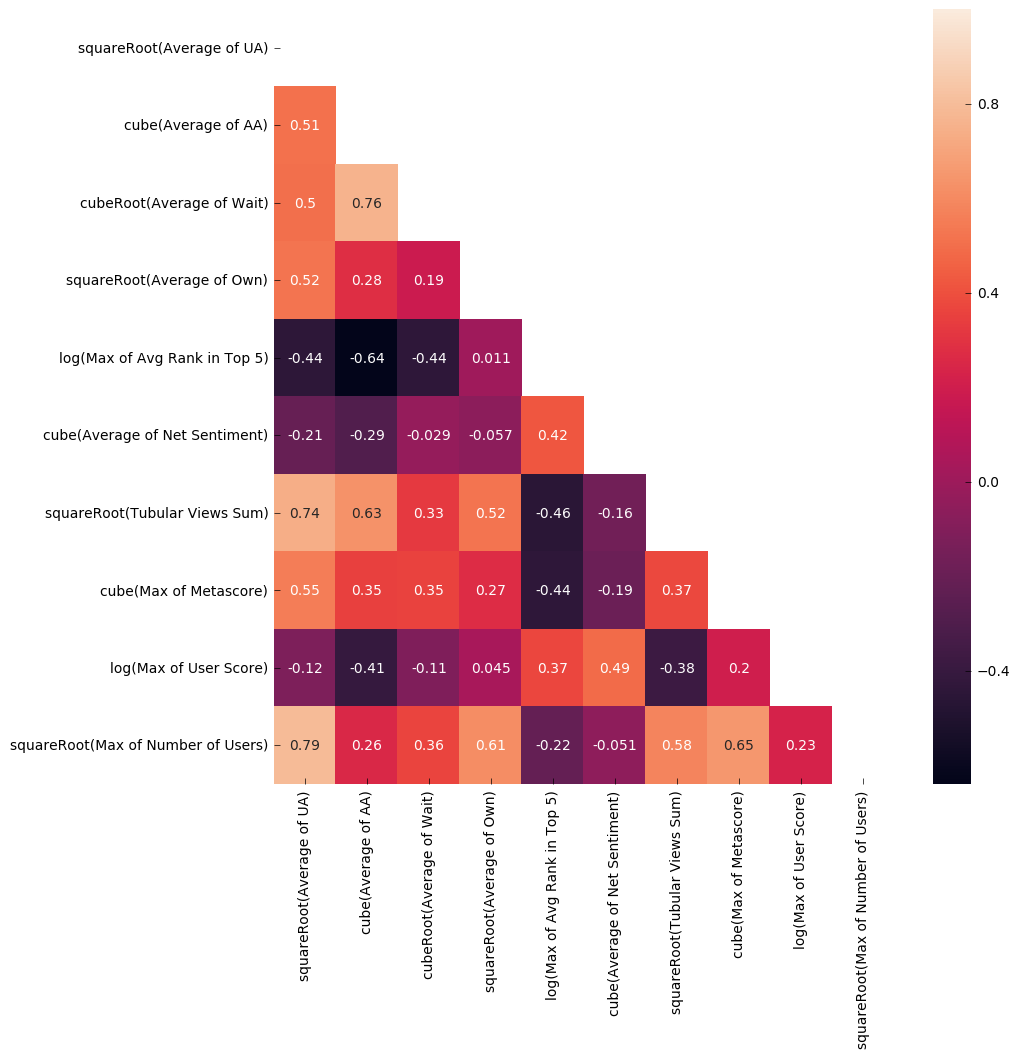

In [168]:
#import pandas.rpy.common as com
import seaborn as sns
%matplotlib inline
corr = df_revenue_vif.corr()
corr.to_excel(path+"\\corr10features.xlsx")
fig, ax = plt.subplots(figsize=(10, 10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = 1
sns_plot = sns.heatmap(corr,mask=mask,ax=ax,annot=True)
fig = sns_plot.get_figure()
fig.savefig(path+"\\corr_plot.png")
sns_plot
#corr.to_excel(path+"correlation_plot.xlsx")

In [173]:
scores['estimator'][0].feature_importances_

array([0.20387322, 0.13228761, 0.063218  , 0.02609129, 0.18390221,
       0.05390624, 0.06187543, 0.14580336, 0.03294763, 0.09609502])

In [174]:
print(scores['test_wmape'].mean())
print(scores['train_wmape'].mean())
print(scores['train_Rsquare'].mean())
print(scores['train_adjRsquare'].mean())

93.25435288363599
27.00063718423201
0.9110080783003719
0.8665121174505579


In [176]:
df_model_cv_prediction = df_revenue_model[['Revenue']]
feature_importances = pd.DataFrame()
feature_importances['Features'] = df_revenue_vif.columns
count = 0
for model in scores['estimator']:
    pred = model.predict(df_revenue_vif)
    feat_imp = model.feature_importances_
    df_model_cv_prediction['model_'+str(count)] = pred
    feature_importances['model_'+str(count)] = feat_imp
    count = count+1
df_model_cv_prediction['mean'] = df_model_cv_prediction.mean(axis=1)
feature_importances['mean'] = feature_importances.mean(axis=1)
feature_importances.sort_values('mean',inplace=True,ascending=False)
#feature_importances[['Features','mean']].to_excel(path+"\\RF_feature_importances.xlsx")
df_model_cv_prediction[['Revenue','mean']].to_excel(path+"//RF_8foldCV_results.xlsx")

C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [159]:
#df_model_cv_prediction
feature_importances[['Features','mean']]

Features      mean
4       log(Max of Avg Rank in Top 5)  0.225671
0           squareRoot(Average of UA)  0.179489
1                 cube(Average of AA)  0.155923
6       squareRoot(Tubular Views Sum)  0.129309
7              cube(Max of Metascore)  0.073386
9  squareRoot(Max of Number of Users)  0.065260
2           cubeRoot(Average of Wait)  0.051423
3          squareRoot(Average of Own)  0.045330
5      cube(Average of Net Sentiment)  0.039379
8              log(Max of User Score)  0.034828

In [136]:
## Cross Validation for XGB
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict,cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer
import xgboost as xgb

mape_score = make_scorer(mean_absolute_percentage_error)
rsquare_score = make_scorer(Rsquare)
rank = np.linalg.matrix_rank(df_revenue_vif)
print(df_revenue_vif.shape)
print(rank)
adjRsquare_score = make_scorer(adjRsquare,rank = rank)
wmape_score = make_scorer(w_mape)
scoring = {'Rsquare':rsquare_score,'adjRsquare':adjRsquare_score,'mape':mape_score,'wmape':wmape_score}
gbm= xgb.XGBRegressor(n_estimators=1000,max_depth=6,max_features=int(df_revenue_vif.shape[1]/3),random_state=7)
predictions = cross_val_predict(gbm, df_revenue_vif,df_revenue_model['Revenue'], cv=8) 
scores = cross_validate(gbm,df_revenue_vif,df_revenue_model['Revenue'],cv=8,scoring = scoring,return_train_score=True,return_estimator=True)


(32, 10)
10


In [137]:
scores

{'estimator': (XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
         max_depth=6, max_features=3, min_child_weight=1, missing=None,
         n_estimators=1000, n_jobs=1, nthread=None, objective='reg:linear',
         random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
         seed=None, silent=True, subsample=1),
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
         max_depth=6, max_features=3, min_child_weight=1, missing=None,
         n_estimators=1000, n_jobs=1, nthread=None, objective='reg:linear',
         random_state=7, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
         seed=None, silent=True, subsample=1),
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
         max_depth

In [138]:
print(scores['test_wmape'].mean())
print(scores['train_wmape'].mean())
print(scores['train_Rsquare'].mean())
print(scores['train_adjRsquare'].mean())

75.5338444200222
4.5169680189868596e-05
0.9999999999994992
0.9999999999992487


In [139]:
df_model_cv_prediction = df_revenue_model[['Revenue']]
count = 0
for model in scores['estimator']:
    pred = model.predict(df_revenue_vif)
    df_model_cv_prediction['model_'+str(count)] = pred
    count = count+1
df_model_cv_prediction['mean'] = df_model_cv_prediction.mean(axis=1)
df_model_cv_prediction[['Revenue','mean']]
#df_model_cv_prediction[['Revenue','mean']].to_excel(path+"//XGB_8foldCV_results.xlsx")

C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sarthak\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Revenue          mean
0   7.183802e+06  1.443868e+07
1   4.147768e+07  3.781663e+07
2   4.002977e+07  3.982121e+07
3   2.285785e+08  2.243323e+08
4   8.998929e+06  8.697861e+06
5   1.065757e+07  1.491800e+07
6   9.390749e+07  9.168551e+07
7   3.135263e+07  3.622917e+07
8   2.370395e+07  2.165769e+07
9   4.715813e+07  4.945710e+07
10  4.896203e+06  7.108918e+06
11  4.707756e+06  5.728739e+06
12  2.419294e+05  8.704716e+05
13  7.900058e+06  7.960938e+06
14  1.187153e+06  8.304604e+06
15  5.164064e+07  5.391880e+07
16  6.823315e+07  6.629628e+07
17  6.170452e+07  5.629572e+07
18  6.816422e+06  6.913289e+06
19  7.926692e+07  7.383181e+07
20  7.840950e+06  7.863231e+06
21  4.324663e+06  5.017674e+06
22  2.050441e+08  1.886197e+08
23  3.201518e+07  3.430429e+07
24  3.946481e+06  4.101101e+06
25  1.493131e+07  1.388347e+07
26  1.248434e+07  1.191593e+07
27  2.038046e+07  1.877013e+07
28  5.784066e+06  5.619959e+06
29  9.275808e+06  9.513348e+06
30  8.279686e+06  8.870246e+06
31  6.146278e+06  7.512690e+06